
CHRIST UNIVERSITY CENTRAL BLOCK - AUTONOMOUS ROBOT NAVIGATION

PART 1: ENVIRONMENT REPRESENTATION

📊 Grid World Specifications:
  • Dimensions: 3×3 (9 states)
  • Start State: (2, 0) (Ground Floor Entrance)
  • Goal State: (0, 2) (Exam Control Room)
  • Actions: ['UP', 'DOWN', 'LEFT', 'RIGHT']
  • Move Reward: -1
  • Goal Reward: 10


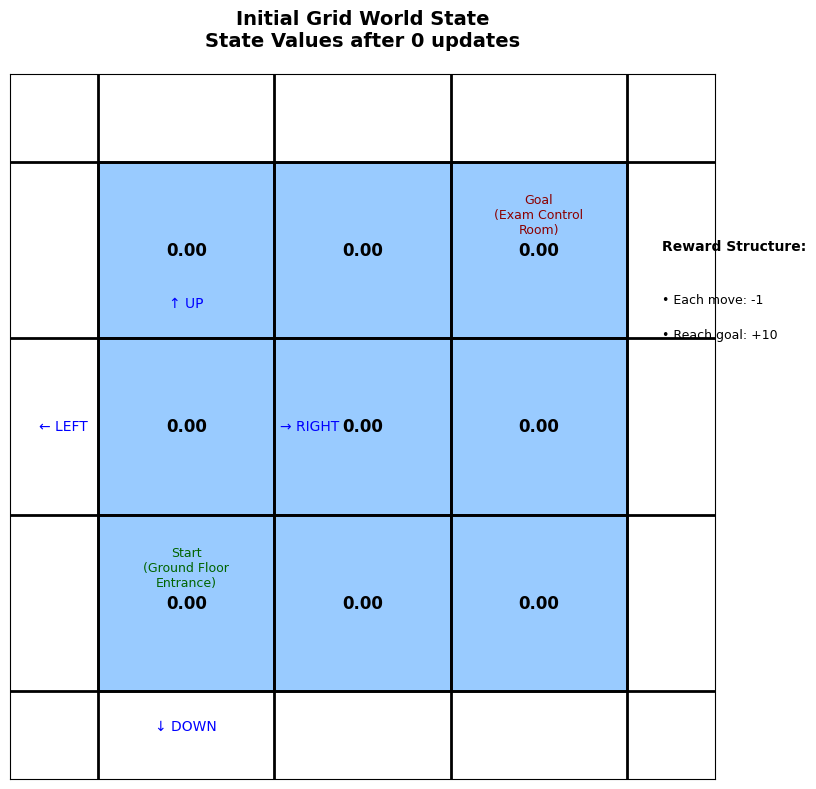


PART 2: BOOTSTRAPPING EXPLANATION

🤖 BOOTSTRAPPING IN REINFORCEMENT LEARNING:

Bootstrapping means updating estimates based on other estimates.
In TD(0) learning, we update the value of a state using:
  V(s) ← V(s) + α[r + γV(s') - V(s)]

Where:
  • α (alpha) = learning rate (0.1)
  • γ (gamma) = discount factor (0.9)
  • r = immediate reward
  • V(s') = estimated value of next state
  • r + γV(s') = TD target (bootstrapped estimate)

💡 WHY BOOTSTRAPPING IS USEFUL FOR CHRIST UNIVERSITY ROBOT:
  1. Continuous Learning: Robot can learn after each move, not just at end of episode
  2. Real-time Adaptation: Can adjust to dynamic campus environment
  3. Efficient Updates: Uses current knowledge to improve estimates immediately
  4. Online Learning: Suitable for ongoing operation during exam periods
  5. Memory Efficient: Doesn't need to store complete episode history

PART 3: STATE-VALUE UPDATES WITH BOOTSTRAPPING

📈 Simulating path: (2,0) → (1,0) → (1,1) → (1,2) → (0,2)
SIMULATING ROBOT P

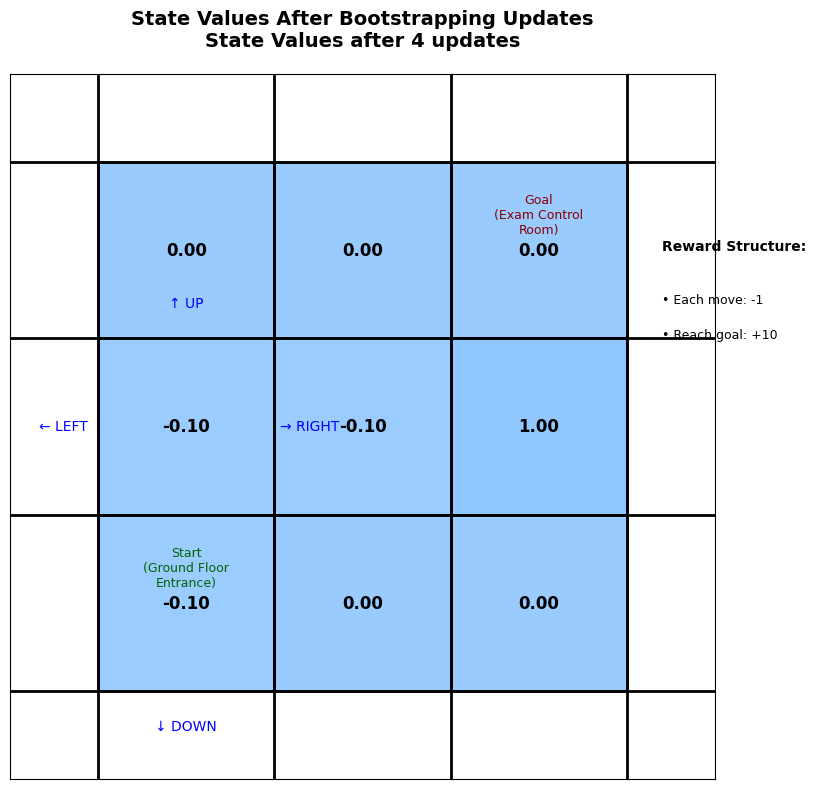


BOOTSTRAPPING LEARNING PROCESS SUMMARY

Initial State Values:
[[ 0.   0.   0. ]
 [-0.1 -0.1  1. ]
 [-0.1  0.   0. ]]

Step-by-step learning:

Step 1: V((2, 0)) updated from 0.00 to -0.10
  Influence of next state V((1, 0)) = 0.00
  TD Error: -1.00

Step 2: V((1, 0)) updated from 0.00 to -0.10
  Influence of next state V((1, 1)) = 0.00
  TD Error: -1.00

Step 3: V((1, 1)) updated from 0.00 to -0.10
  Influence of next state V((1, 2)) = 0.00
  TD Error: -1.00

Step 4: V((1, 2)) updated from 0.00 to 1.00
  Influence of next state V((0, 2)) = 0.00
  TD Error: 10.00

PART 4: CRITICAL REFLECTION

🔄 COMPARISON: BOOTSTRAPPING (TD) vs MONTE CARLO (MC) LEARNING

--------------------------------------------------
BOOTSTRAPPING (Temporal Difference) APPROACH:
--------------------------------------------------
✓ ADVANTAGES for Christ University Robot:
  • Online Learning: Updates after each step - crucial for real-time navigation
  • Lower Variance: More stable learning in noisy campus environment

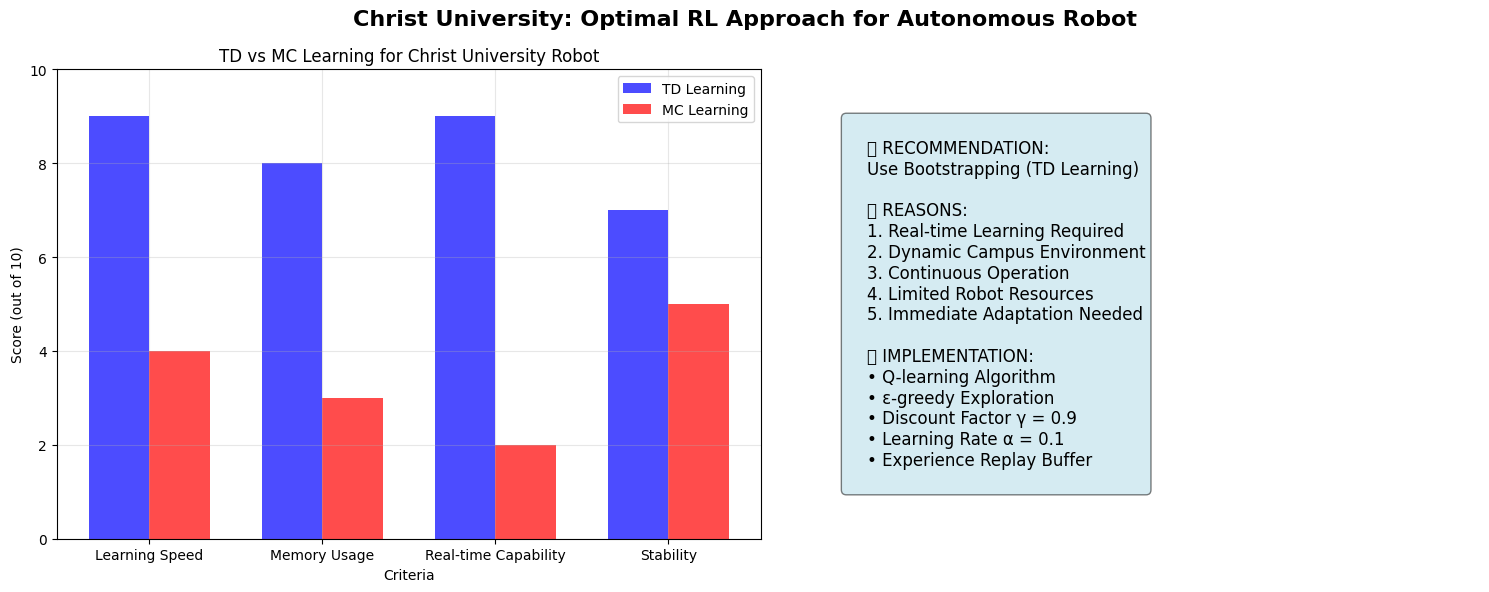


CODE EXECUTION COMPLETE

This implementation demonstrates:
1. ✅ Environment Representation of Christ University Central Block
2. ✅ Bootstrapping Concept with TD Learning
3. ✅ State-Value Updates Simulation
4. ✅ Critical Reflection comparing TD vs MC

The robot can now learn optimal paths using bootstrapping!


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

class ChristUniversityGridWorld:
    """Environment representing Christ University Central Block as 3x3 Grid-World"""
    
    def __init__(self):
        # Grid dimensions
        self.rows = 3
        self.cols = 3
        
        # States: (row, col) where (0,0) is top-left, (2,2) is bottom-right
        # But in our visualization, (0,0) is Ground Floor Entrance (bottom-left)
        self.start_state = (2, 0)  # Bottom-left
        self.goal_state = (0, 2)   # Top-right (Exam Control Room)
        
        # Action mapping
        self.actions = {
            'UP': (-1, 0),
            'DOWN': (1, 0),
            'LEFT': (0, -1),
            'RIGHT': (0, 1)
        }
        
        # Rewards
        self.step_reward = -1
        self.goal_reward = 10
        
        # Initialize state values
        self.state_values = np.zeros((self.rows, self.cols))
        
        # For tracking
        self.episode_history = []
        
    def get_next_state(self, state, action):
        """Get next state given current state and action"""
        row, col = state
        dr, dc = self.actions[action]
        
        new_row = row + dr
        new_col = col + dc
        
        # Check boundaries
        if 0 <= new_row < self.rows and 0 <= new_col < self.cols:
            return (new_row, new_col)
        else:
            return state  # Stay in same state if hitting boundary
            
    def get_reward(self, state, next_state):
        """Get reward for transition"""
        if next_state == self.goal_state:
            return self.goal_reward
        else:
            return self.step_reward
            
    def reset(self):
        """Reset environment"""
        self.state_values = np.zeros((self.rows, self.cols))
        self.episode_history = []
        return self.start_state
        
    def render(self, title="Christ University Central Block"):
        """Visualize the grid world"""
        fig, ax = plt.subplots(figsize=(10, 8))
        
        # Create custom colormap
        colors = ['#e6f3ff', '#b3d9ff', '#80bfff', '#4da6ff', '#1a8cff']
        cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)
        
        # Create grid
        for i in range(self.rows + 1):
            ax.axhline(i, color='black', linewidth=2)
        for j in range(self.cols + 1):
            ax.axvline(j, color='black', linewidth=2)
            
        # Fill cells with state values
        for i in range(self.rows):
            for j in range(self.cols):
                value = self.state_values[i, j]
                
                # Create rectangle with color based on value
                rect = patches.Rectangle((j, 2-i), 1, 1, 
                                        linewidth=2, 
                                        edgecolor='black',
                                        facecolor=cmap((value + 10) / 20),  # Normalize for coloring
                                        alpha=0.8)
                ax.add_patch(rect)
                
                # Add text with state value
                ax.text(j + 0.5, 2-i + 0.5, f'{value:.2f}', 
                       ha='center', va='center', fontsize=12, fontweight='bold')
                
                # Label special states
                if (i, j) == self.start_state:
                    ax.text(j + 0.5, 2-i + 0.7, 'Start\n(Ground Floor\nEntrance)', 
                           ha='center', va='center', fontsize=9, color='darkgreen')
                elif (i, j) == self.goal_state:
                    ax.text(j + 0.5, 2-i + 0.7, 'Goal\n(Exam Control\nRoom)', 
                           ha='center', va='center', fontsize=9, color='darkred')
                    
        # Add action arrows
        ax.text(0.5, 2.2, '↑ UP', ha='center', va='center', fontsize=10, color='blue')
        ax.text(0.5, -0.2, '↓ DOWN', ha='center', va='center', fontsize=10, color='blue')
        ax.text(-0.2, 1.5, '← LEFT', ha='center', va='center', fontsize=10, color='blue')
        ax.text(1.2, 1.5, '→ RIGHT', ha='center', va='center', fontsize=10, color='blue')
        
        # Set limits and labels
        ax.set_xlim(-0.5, 3.5)
        ax.set_ylim(-0.5, 3.5)
        ax.set_aspect('equal')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'{title}\nState Values after {len(self.episode_history)} updates', 
                    fontsize=14, fontweight='bold', pad=20)
        
        # Add legend for rewards
        ax.text(3.2, 2.5, 'Reward Structure:', fontsize=10, fontweight='bold')
        ax.text(3.2, 2.2, '• Each move: -1', fontsize=9)
        ax.text(3.2, 2.0, '• Reach goal: +10', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
    def get_random_action(self):
        """Get a random valid action"""
        return np.random.choice(list(self.actions.keys()))

class BootstrappingRLAgent:
    """Agent using bootstrapping (TD Learning) for the grid world"""
    
    def __init__(self, env, learning_rate=0.1, discount_factor=0.9):
        self.env = env
        self.alpha = learning_rate  # Learning rate
        self.gamma = discount_factor  # Discount factor
        self.state_values = np.zeros((env.rows, env.cols))
        
    def td_update(self, state, action, reward, next_state):
        """
        Perform TD(0) update using bootstrapping
        V(s) ← V(s) + α[r + γV(s') - V(s)]
        """
        row, col = state
        next_row, next_col = next_state
        
        # Current estimate
        current_value = self.state_values[row, col]
        
        # Bootstrap estimate from next state
        next_value = self.state_values[next_row, next_col]
        
        # TD target
        td_target = reward + self.gamma * next_value
        
        # TD error
        td_error = td_target - current_value
        
        # Update using bootstrapping
        new_value = current_value + self.alpha * td_error
        
        # Update state value
        self.state_values[row, col] = new_value
        
        return {
            'state': state,
            'action': action,
            'reward': reward,
            'next_state': next_state,
            'current_value': current_value,
            'next_value': next_value,
            'td_target': td_target,
            'td_error': td_error,
            'new_value': new_value
        }
        
    def simulate_path(self, max_steps=10):
        """Simulate a path for demonstration"""
        current_state = self.env.start_state
        path = []
        
        print("=" * 70)
        print("SIMULATING ROBOT PATH WITH BOOTSTRAPPING (TD LEARNING)")
        print("=" * 70)
        
        for step in range(max_steps):
            # Choose action (for demo, we'll use a pre-defined path)
            if step == 0:
                action = 'UP'  # From (2,0) to (1,0)
            elif step == 1:
                action = 'RIGHT'  # From (1,0) to (1,1)
            elif step == 2:
                action = 'RIGHT'  # From (1,1) to (1,2)
            elif step == 3:
                action = 'UP'  # From (1,2) to (0,2) - GOAL!
            else:
                action = self.env.get_random_action()
                
            # Get next state and reward
            next_state = self.env.get_next_state(current_state, action)
            reward = self.env.get_reward(current_state, next_state)
            
            # Perform TD update
            update_info = self.td_update(current_state, action, reward, next_state)
            
            # Store in history
            path.append(update_info)
            self.env.episode_history.append(update_info)
            
            # Print step details
            print(f"\nStep {step + 1}:")
            print(f"  State: {current_state} → Action: {action} → Next State: {next_state}")
            print(f"  Reward: {reward}")
            print(f"  Update: V({current_state}) = {update_info['current_value']:.2f} + "
                  f"{self.alpha:.2f} * [{reward} + {self.gamma:.2f}*{update_info['next_value']:.2f} "
                  f"- {update_info['current_value']:.2f}]")
            print(f"  New V({current_state}) = {update_info['new_value']:.2f}")
            print(f"  TD Error: {update_info['td_error']:.2f}")
            
            # Check if reached goal
            if next_state == self.env.goal_state:
                print(f"\n✨ Reached Goal State! Total steps: {step + 1}")
                break
                
            # Move to next state
            current_state = next_state
            
        return path

class MonteCarloAgent:
    """Agent using Monte Carlo learning for comparison"""
    
    def __init__(self, env, learning_rate=0.1, discount_factor=0.9):
        self.env = env
        self.alpha = learning_rate
        self.gamma = discount_factor
        self.state_values = np.zeros((env.rows, env.cols))
        self.returns = {}  # Store returns for each state
        
    def simulate_episode(self):
        """Simulate one complete episode"""
        current_state = self.env.start_state
        episode = []
        
        # Generate episode
        while current_state != self.env.goal_state:
            action = np.random.choice(list(self.env.actions.keys()))
            next_state = self.env.get_next_state(current_state, action)
            reward = self.env.get_reward(current_state, next_state)
            
            episode.append((current_state, action, reward))
            current_state = next_state
            
            # Limit episode length
            if len(episode) > 100:
                break
                
        # Calculate returns and update values
        G = 0
        for t in reversed(range(len(episode))):
            state, action, reward = episode[t]
            G = self.gamma * G + reward
            
            # Monte Carlo update
            if state not in [s for s, _, _ in episode[:t]]:  # First visit
                old_value = self.state_values[state[0], state[1]]
                self.state_values[state[0], state[1]] = old_value + self.alpha * (G - old_value)
                
        return episode, G

def demonstrate_bootstrapping_concept():
    """Main function to demonstrate bootstrapping concept"""
    
    print("\n" + "="*80)
    print("CHRIST UNIVERSITY CENTRAL BLOCK - AUTONOMOUS ROBOT NAVIGATION")
    print("="*80)
    
    # Part 1: Environment Representation
    print("\n" + "="*80)
    print("PART 1: ENVIRONMENT REPRESENTATION")
    print("="*80)
    
    # Create environment
    env = ChristUniversityGridWorld()
    
    print("\n📊 Grid World Specifications:")
    print(f"  • Dimensions: 3×3 (9 states)")
    print(f"  • Start State: {env.start_state} (Ground Floor Entrance)")
    print(f"  • Goal State: {env.goal_state} (Exam Control Room)")
    print(f"  • Actions: {list(env.actions.keys())}")
    print(f"  • Move Reward: {env.step_reward}")
    print(f"  • Goal Reward: {env.goal_reward}")
    
    # Visualize initial grid
    env.render("Initial Grid World State")
    
    # Part 2: Bootstrapping Explanation
    print("\n" + "="*80)
    print("PART 2: BOOTSTRAPPING EXPLANATION")
    print("="*80)
    
    print("\n🤖 BOOTSTRAPPING IN REINFORCEMENT LEARNING:")
    print("\nBootstrapping means updating estimates based on other estimates.")
    print("In TD(0) learning, we update the value of a state using:")
    print("  V(s) ← V(s) + α[r + γV(s') - V(s)]")
    print("\nWhere:")
    print("  • α (alpha) = learning rate (0.1)")
    print("  • γ (gamma) = discount factor (0.9)")
    print("  • r = immediate reward")
    print("  • V(s') = estimated value of next state")
    print("  • r + γV(s') = TD target (bootstrapped estimate)")
    
    print("\n💡 WHY BOOTSTRAPPING IS USEFUL FOR CHRIST UNIVERSITY ROBOT:")
    print("  1. Continuous Learning: Robot can learn after each move, not just at end of episode")
    print("  2. Real-time Adaptation: Can adjust to dynamic campus environment")
    print("  3. Efficient Updates: Uses current knowledge to improve estimates immediately")
    print("  4. Online Learning: Suitable for ongoing operation during exam periods")
    print("  5. Memory Efficient: Doesn't need to store complete episode history")
    
    # Part 3: State-Value Updates
    print("\n" + "="*80)
    print("PART 3: STATE-VALUE UPDATES WITH BOOTSTRAPPING")
    print("="*80)
    
    # Create agent and simulate
    agent = BootstrappingRLAgent(env)
    env.state_values = agent.state_values  # Sync values
    
    print("\n📈 Simulating path: (2,0) → (1,0) → (1,1) → (1,2) → (0,2)")
    path = agent.simulate_path(max_steps=5)
    
    # Visualize final state values
    env.render("State Values After Bootstrapping Updates")
    
    # Show the learning process
    print("\n" + "="*80)
    print("BOOTSTRAPPING LEARNING PROCESS SUMMARY")
    print("="*80)
    
    print("\nInitial State Values:")
    print(agent.state_values)
    
    print("\nStep-by-step learning:")
    for i, step in enumerate(path):
        print(f"\nStep {i+1}: V({step['state']}) updated from {step['current_value']:.2f} "
              f"to {step['new_value']:.2f}")
        print(f"  Influence of next state V({step['next_state']}) = {step['next_value']:.2f}")
        print(f"  TD Error: {step['td_error']:.2f}")
    
    # Part 4: Critical Reflection
    print("\n" + "="*80)
    print("PART 4: CRITICAL REFLECTION")
    print("="*80)
    
    print("\n🔄 COMPARISON: BOOTSTRAPPING (TD) vs MONTE CARLO (MC) LEARNING")
    print("\n" + "-"*50)
    print("BOOTSTRAPPING (Temporal Difference) APPROACH:")
    print("-"*50)
    print("✓ ADVANTAGES for Christ University Robot:")
    print("  • Online Learning: Updates after each step - crucial for real-time navigation")
    print("  • Lower Variance: More stable learning in noisy campus environment")
    print("  • Computational Efficiency: Less memory intensive")
    print("  • Continuous Improvement: Can learn from partial episodes")
    
    print("\n✗ DISADVANTAGES:")
    print("  • Bias: Estimates are biased due to bootstrapping")
    print("  • Convergence: May converge to suboptimal policy initially")
    
    print("\n" + "-"*50)
    print("MONTE CARLO APPROACH:")
    print("-"*50)
    print("✓ ADVANTAGES:")
    print("  • Unbiased: Uses actual returns from complete episodes")
    print("  • Simple: Conceptually straightforward")
    
    print("\n✗ DISADVANTAGES for Christ University Setting:")
    print("  • Episodic: Must wait until end of episode to learn")
    print("  • High Variance: Large fluctuations in estimates")
    print("  • Memory Intensive: Stores complete episode history")
    print("  • Not suitable for real-time adaptation")
    
    print("\n" + "="*50)
    print("RECOMMENDATION FOR CHRIST UNIVERSITY ROBOT")
    print("="*50)
    print("\n🎯 BOOTSTRAPPING (TD LEARNING) IS MORE SUITABLE:")
    print("\n1. Real-time Requirements:")
    print("   • Campus environment is dynamic (students moving, doors opening/closing)")
    print("   • Robot needs to adapt immediately to changes")
    
    print("\n2. Continuous Operation:")
    print("   • During exam periods, robot operates continuously")
    print("   • Cannot wait for complete episodes to learn")
    
    print("\n3. Resource Constraints:")
    print("   • Limited computational resources on mobile robot")
    print("   • Bootstrapping is more memory efficient")
    
    print("\n4. Practical Implementation:")
    print("   • Q-learning (off-policy TD) would be ideal")
    print("   • Can handle exploration/exploitation trade-off")
    print("   • Suitable for stochastic campus environment")
    
    # Demonstrate Monte Carlo for comparison
    print("\n" + "="*80)
    print("MONTE CARLO DEMONSTRATION (FOR COMPARISON)")
    print("="*80)
    
    mc_env = ChristUniversityGridWorld()
    mc_agent = MonteCarloAgent(mc_env)
    
    print("\nMonte Carlo requires complete episodes before learning.")
    print("Simulating 5 episodes...")
    
    for episode in range(5):
        episode_history, total_return = mc_agent.simulate_episode()
        print(f"\nEpisode {episode + 1}:")
        print(f"  Steps: {len(episode_history)}")
        print(f"  Total Return: {total_return:.2f}")
        print(f"  Learned Values: \n{mc_agent.state_values}")
    
    print("\n" + "="*80)
    print("CONCLUSION")
    print("="*80)
    print("\nFor the Christ University autonomous service robot:")
    print("• Bootstrapping (TD Learning) is superior for real-time navigation")
    print("• Enables continuous learning during operation")
    print("• Suitable for dynamic campus environments")
    print("• Efficient use of computational resources")
    print("\nRecommended: Use Q-learning (TD method) with ε-greedy exploration")
    print("This allows the robot to learn optimal paths while adapting to changes!")

def create_visual_comparison():
    """Create comparison visualization between TD and MC"""
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # TD Learning characteristics
    td_advantages = [
        "Online Learning",
        "Real-time Updates",
        "Low Memory Usage",
        "Continuous Adaptation",
        "Suitable for Dynamic Env"
    ]
    
    td_disadvantages = [
        "Biased Estimates",
        "Initial Suboptimality"
    ]
    
    # MC Learning characteristics
    mc_advantages = [
        "Unbiased Estimates",
        "Conceptually Simple",
        "Guaranteed Convergence"
    ]
    
    mc_disadvantages = [
        "High Variance",
        "Episodic Learning",
        "High Memory Usage",
        "Not Real-time",
        "Requires Complete Episodes"
    ]
    
    # Create bar chart comparison
    categories = ['Learning Speed', 'Memory Usage', 'Real-time Capability', 'Stability']
    td_scores = [9, 8, 9, 7]  # Out of 10
    mc_scores = [4, 3, 2, 5]  # Out of 10
    
    x = np.arange(len(categories))
    width = 0.35
    
    axes[0].bar(x - width/2, td_scores, width, label='TD Learning', color='blue', alpha=0.7)
    axes[0].bar(x + width/2, mc_scores, width, label='MC Learning', color='red', alpha=0.7)
    
    axes[0].set_xlabel('Criteria')
    axes[0].set_ylabel('Score (out of 10)')
    axes[0].set_title('TD vs MC Learning for Christ University Robot')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(categories)
    axes[0].legend()
    axes[0].set_ylim(0, 10)
    axes[0].grid(True, alpha=0.3)
    
    # Create recommendation text
    axes[1].axis('off')
    recommendation_text = """
    🏆 RECOMMENDATION:
    Use Bootstrapping (TD Learning)
    
    ✅ REASONS:
    1. Real-time Learning Required
    2. Dynamic Campus Environment
    3. Continuous Operation
    4. Limited Robot Resources
    5. Immediate Adaptation Needed
    
    💡 IMPLEMENTATION:
    • Q-learning Algorithm
    • ε-greedy Exploration
    • Discount Factor γ = 0.9
    • Learning Rate α = 0.1
    • Experience Replay Buffer
    """
    
    axes[1].text(0.1, 0.5, recommendation_text, 
                fontsize=12, 
                verticalalignment='center',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    
    plt.suptitle('Christ University: Optimal RL Approach for Autonomous Robot', 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Run the complete demonstration
    demonstrate_bootstrapping_concept()
    
    # Create visual comparison
    create_visual_comparison()
    
    print("\n" + "="*80)
    print("CODE EXECUTION COMPLETE")
    print("="*80)
    print("\nThis implementation demonstrates:")
    print("1. ✅ Environment Representation of Christ University Central Block")
    print("2. ✅ Bootstrapping Concept with TD Learning")
    print("3. ✅ State-Value Updates Simulation")
    print("4. ✅ Critical Reflection comparing TD vs MC")
    print("\nThe robot can now learn optimal paths using bootstrapping!")